## Dependencies

In [1]:
import sys

transforms_path = "D:/Github Repos/Spider Seg e19005/spider-seg-e19005/transforms/"

sys.path.append(transforms_path)

import pathlib
import SimpleITK as sitk
import numpy as np

import array_transforms
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [2]:
patient_id = 2


image_t1_path = f"D:/Spider Data/images/{patient_id}_t1.mha"
label_t1_path = f"D:/Spider Data/masks/{patient_id}_t1.mha"
image_t2_path = f"D:/Spider Data/images/{patient_id}_t2.mha"

image_t1_sitk = sitk.ReadImage(image_t1_path)
image_t1_np = sitk.GetArrayFromImage(image_t1_sitk)
#print(image_sitk)
print(image_t1_np.shape)

label_t1_sitk = sitk.ReadImage(label_t1_path)
label_t1_np = sitk.GetArrayFromImage(label_t1_sitk)
#print(image_sitk)
print(label_t1_np.shape)

image_t2_sitk = sitk.ReadImage(image_t2_path)
image_t2_np = sitk.GetArrayFromImage(image_t2_sitk)
#print(image_sitk)
print(image_t2_np.shape)


(294, 320, 17)
(294, 320, 17)
(346, 384, 17)


In [3]:
""""
def convert_hu_to_rgb_3d(image_np, window_center=None, window_width=None, colormap_name='gray', is_label=False):
    # Ensure the input is a NumPy array
    if not isinstance(image_np, np.ndarray):
        raise TypeError("Input image must be a NumPy array.")

    # Determine the smallest dimension for slicing
    smallest_dim = np.argmin(image_np.shape)
    slices = np.moveaxis(image_np, smallest_dim, 0)  # Move smallest dimension to the front for iteration

    # Prepare an output array for RGB slices
    output_shape = list(image_np.shape)
    output_shape.insert(3, 3)  # Add an RGB channel at the end
    rgb_array = np.zeros(output_shape, dtype=np.uint8)

    # Process each slice
    for i, slice_img in enumerate(slices):
        if is_label:
            # If the image is a label, expand the single-channel image into 3 channels (RGB)
            rgb_slice = np.stack([slice_img] * 3, axis=-1).astype(np.uint8)
        else:
            # Determine default window center and width if not provided
            if window_center is None:
                window_center = np.mean(slice_img)
            if window_width is None:
                window_width = np.max(slice_img) - np.min(slice_img)
            
            # Windowing: convert HU to grayscale
            min_value = window_center - window_width // 2
            max_value = window_center + window_width // 2
            slice_img = np.clip(slice_img, min_value, max_value)
            slice_img = (slice_img - min_value) / (max_value - min_value) * 255.0
            slice_img = slice_img.astype(np.uint8)

            # Apply colormap
            cmap = get_cmap(colormap_name)
            rgb_slice = cmap(slice_img)

            # Convert to 8-bit RGB
            rgb_slice = (rgb_slice[:, :, :3] * 255).astype(np.uint8)
        
        # Assign the RGB slice back to the appropriate position
        if smallest_dim == 0:
            rgb_array[i] = rgb_slice
        elif smallest_dim == 1:
            rgb_array[:, i, :, :] = rgb_slice
        elif smallest_dim == 2:
            rgb_array[:, :, i, :] = rgb_slice

    return rgb_array
"""

'"\ndef convert_hu_to_rgb_3d(image_np, window_center=None, window_width=None, colormap_name=\'gray\', is_label=False):\n    # Ensure the input is a NumPy array\n    if not isinstance(image_np, np.ndarray):\n        raise TypeError("Input image must be a NumPy array.")\n\n    # Determine the smallest dimension for slicing\n    smallest_dim = np.argmin(image_np.shape)\n    slices = np.moveaxis(image_np, smallest_dim, 0)  # Move smallest dimension to the front for iteration\n\n    # Prepare an output array for RGB slices\n    output_shape = list(image_np.shape)\n    output_shape.insert(3, 3)  # Add an RGB channel at the end\n    rgb_array = np.zeros(output_shape, dtype=np.uint8)\n\n    # Process each slice\n    for i, slice_img in enumerate(slices):\n        if is_label:\n            # If the image is a label, expand the single-channel image into 3 channels (RGB)\n            rgb_slice = np.stack([slice_img] * 3, axis=-1).astype(np.uint8)\n        else:\n            # Determine default wi

In [4]:
#image_rgb = convert_hu_to_rgb_3d(image_t1_np, is_label=False)

#print(image_rgb.shape)

In [5]:
idx = 12

t1_slice = image_t1_np[:, :, idx]
print(t1_slice.shape)

t1_slice_flip = np.flipud(t1_slice)

t1_label_slice = label_t1_np[:, :, idx]
t1_label_slice_flip = np.flipud(t1_label_slice)

t2_slice = image_t2_np[:, :, idx]
print(t2_slice.shape)

t2_slice_flip = np.flipud(t2_slice)




(294, 320)
(346, 384)


In [6]:
"""
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 10))  # Adjust figsize as needed

axes[0].imshow(t1_slice_flip, cmap='grey')
axes[0].axis('off')  # Optional: remove axis

axes[1].imshow(t2_slice_flip, cmap='grey')
axes[1].axis('off')  # Optional: remove axis

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
"""

"\n# Create subplots: 1 row, 2 columns\nfig, axes = plt.subplots(1, 2, figsize=(10, 10))  # Adjust figsize as needed\n\naxes[0].imshow(t1_slice_flip, cmap='grey')\naxes[0].axis('off')  # Optional: remove axis\n\naxes[1].imshow(t2_slice_flip, cmap='grey')\naxes[1].axis('off')  # Optional: remove axis\n\n# Adjust layout for better spacing\nplt.tight_layout()\nplt.show()\n"

In [7]:
# Create subplots: 1 row, 2 columns
"""
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 10))  # Adjust figsize as needed

t1_label_slice_flip_enhanced = (t1_label_slice_flip - np.min(t1_label_slice_flip)) * 10  # Amplify differences

axes2[0].imshow(t1_slice_flip, cmap='grey')
axes2[0].axis('off')  # Optional: remove axis

axes2[1].imshow(t1_label_slice_flip_enhanced, cmap='grey')
axes2[1].axis('off')  # Optional: remove axis

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
"""

"\nfig2, axes2 = plt.subplots(1, 2, figsize=(10, 10))  # Adjust figsize as needed\n\nt1_label_slice_flip_enhanced = (t1_label_slice_flip - np.min(t1_label_slice_flip)) * 10  # Amplify differences\n\naxes2[0].imshow(t1_slice_flip, cmap='grey')\naxes2[0].axis('off')  # Optional: remove axis\n\naxes2[1].imshow(t1_label_slice_flip_enhanced, cmap='grey')\naxes2[1].axis('off')  # Optional: remove axis\n\n# Adjust layout for better spacing\nplt.tight_layout()\nplt.show()\n"

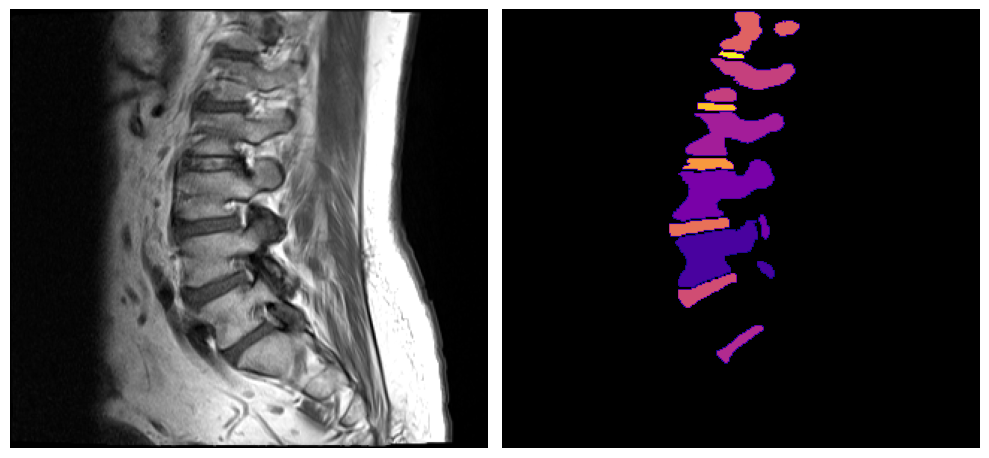

Plots saved to: C:/Users/kosta/Desktop/export mri slice png


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define directory to save plots
directory = r"C:/Users/kosta/Desktop/export mri slice png"
os.makedirs(directory, exist_ok=True)  # Ensure directory exists

# Create subplots: 1 row, 2 columns
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 10))  # Adjust figsize as needed

# Mask for non-zero values
t1_label_nonzero = t1_label_slice_flip != 0
enhanced_label = t1_label_slice_flip.copy()

# Amplify non-zero differences
enhanced_label[t1_label_nonzero] = (
    (enhanced_label[t1_label_nonzero] - np.min(enhanced_label[t1_label_nonzero])) * 1000
)

# Custom colormap with black for zero values
cmap = plt.cm.plasma
new_cmap = cmap.with_extremes(under='black')  # Set black for values below vmin

# Plot original slice
axes2[0].imshow(t1_slice_flip, cmap='gray')
axes2[0].axis('off')
original_path = os.path.join(directory, "original_slice.png")
plt.imsave(original_path, t1_slice_flip, cmap='gray')  # Save original slice

# Plot enhanced label with zero as black
axes2[1].imshow(enhanced_label, cmap=new_cmap, vmin=0.001)
axes2[1].axis('off')
enhanced_path = os.path.join(directory, "original_label.png")
plt.imsave(enhanced_path, enhanced_label, cmap=new_cmap, vmin=0.001)  # Save enhanced label

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

print(f"Plots saved to: {directory}")

In [9]:
""""
import os

output_dir = "C:/Users/kosta/Desktop/export mri slice png/"

for idx in range (0, image_t1_np.shape[2]):
    slice_2d = image_t1_np[:, :, idx]
    slice_2d = np.flipud(slice_2d)
        # Normalize the slice (optional but recommended for better contrast)
    slice_norm = (slice_2d - slice_2d.min()) / (slice_2d.max() - slice_2d.min() + 1e-8)

    # Save the slice as a grayscale PNG image
    output_path = os.path.join(output_dir, f'slice_{idx:03d}.png')
    plt.imsave(output_path, slice_norm, cmap='gray')

    print(f'Saved {output_path}')

print("All slices exported successfully!")
"""

'"\nimport os\n\noutput_dir = "C:/Users/kosta/Desktop/export mri slice png/"\n\nfor idx in range (0, image_t1_np.shape[2]):\n    slice_2d = image_t1_np[:, :, idx]\n    slice_2d = np.flipud(slice_2d)\n        # Normalize the slice (optional but recommended for better contrast)\n    slice_norm = (slice_2d - slice_2d.min()) / (slice_2d.max() - slice_2d.min() + 1e-8)\n\n    # Save the slice as a grayscale PNG image\n    output_path = os.path.join(output_dir, f\'slice_{idx:03d}.png\')\n    plt.imsave(output_path, slice_norm, cmap=\'gray\')\n\n    print(f\'Saved {output_path}\')\n\nprint("All slices exported successfully!")\n'

In [ ]:
import albumentations as A

elastic_transform = A.Compose(
    [
        A.HorizontalFlip(p = 0.5),
        A.VerticalFlip(p = 0.5),
        #A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p = 0.5),
        A.ElasticTransform(alpha=1, sigma=50, p = 1.0),
        #A.GridDistortion(num_steps=5, distort_limit=0.3, p = 0.5)
    ]
)

noise_transform = A.Compose(
    [
        #A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
        A.GaussNoise(var_limit=(0.001, 0.01), p = 1)
    ]
)


d:\Software\Anaconda\envs\spider-torch-tb\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


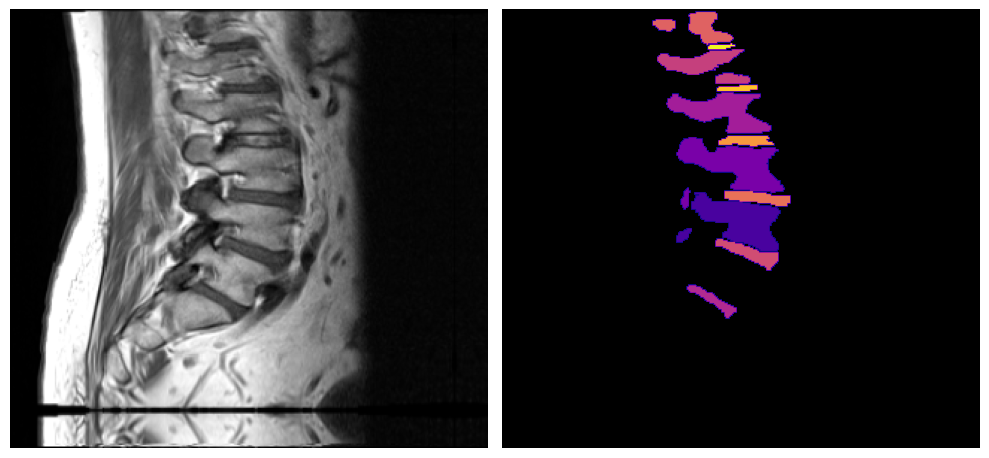

Plots saved to: C:\Users\kosta\Desktop\export mri slice png


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define directory to save plots
directory = r"C:\Users\kosta\Desktop\export mri slice png"
os.makedirs(directory, exist_ok=True)  # Ensure directory exists

# Apply and show how augs are applied before converting to tensor
print(type(t1_slice_flip))
print(type(t1_label_slice_flip))

elastic_result = elastic_transform(image=t1_slice_flip, mask=t1_label_slice_flip)

image_deformed = elastic_result["image"]
label_deformed = elastic_result["mask"]

# Create subplots: 1 row, 2 columns
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 10))  # Adjust figsize as needed

# Mask for non-zero values
label_deformed_enh = label_deformed != 0
enhanced_label = label_deformed.copy()

# Amplify non-zero differences
enhanced_label[label_deformed_enh] = (
    (enhanced_label[label_deformed_enh] - np.min(enhanced_label[label_deformed_enh])) * 1000
)

# Custom colormap with black for zero values
cmap = plt.cm.plasma
new_cmap = cmap.with_extremes(under='black')  # Set black for values below vmin

# Plot augmented image
axes2[0].imshow(image_deformed, cmap='gray')
axes2[0].axis('off')
augmented_image_path = os.path.join(directory, "augmented_image.png")
plt.imsave(augmented_image_path, image_deformed, cmap='gray')  # Save augmented image

# Plot enhanced label with zero as black
axes2[1].imshow(enhanced_label, cmap=new_cmap, vmin=0.001)
axes2[1].axis('off')
label_path = os.path.join(directory, "label.png")
plt.imsave(label_path, enhanced_label, cmap=new_cmap, vmin=0.001)  # Save label

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

print(f"Plots saved to: {directory}")


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


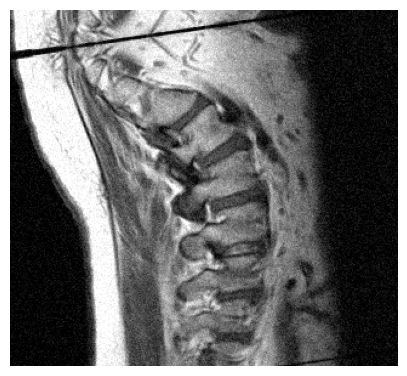

Noisy image saved to: C:\Users\kosta\Desktop\export mri slice png


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define directory to save plots
directory = r"C:\Users\kosta\Desktop\export mri slice png"
os.makedirs(directory, exist_ok=True)  # Ensure directory exists

# Apply and show how augs are applied before converting to tensor
print(type(t1_slice_flip))
print(type(t1_label_slice_flip))

elastic_result = elastic_transform(image=t1_slice_flip, mask=t1_label_slice_flip)

image_deformed = elastic_result["image"].astype(np.float32)
label_deformed = elastic_result["mask"]

# Normalize image before adding noise
image_min, image_max = image_deformed.min(), image_deformed.max()
image_normalized = (image_deformed - image_min) / (image_max - image_min)  # Normalize to [0,1]

# Apply noise transform
noise_result = noise_transform(image=image_normalized)
noisy_image = noise_result["image"].astype(np.float32)

# Optionally denormalize before saving (convert back to original range)
noisy_image_denormalized = noisy_image * (image_max - image_min) + image_min

# Save noisy image
noisy_image_path = os.path.join(directory, "noisy_image.png")
plt.imsave(noisy_image_path, noisy_image_denormalized, cmap='gray')

# Plot noisy image
plt.figure(figsize=(5, 5))
plt.imshow(noisy_image_denormalized, cmap='gray')
plt.axis('off')
plt.show()

print(f"Noisy image saved to: {directory}")
